<a href="https://colab.research.google.com/github/aneeshcheriank/tensorflow/blob/main/Functional_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functional API

- 3 steps
  - define input
  - define layer
  - create model

In [13]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow import keras
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# impot data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# add 3rd dim to image
# normalize the pixcel values
def preprocess_image(img):
  img = np.expand_dims(img, axis=3)
  img = img/255.

  return img


x_train = preprocess_image(x_train)
x_test = preprocess_image(x_test)

# model
def model_1():
  input = Input(shape=(28, 28, 1))
  flatten = Flatten()(input)
  layer1 = Dense(128, activation='relu')(flatten)
  layer2 = Dense(10, activation='softmax')(layer1)

  model = keras.Model(
      inputs = input,
      outputs = layer2
  )

  model.compile(
      loss = 'sparse_categorical_crossentropy',
      optimizer = 'adam',
      metrics=['acc']
  )

  return model

model = model_1()

history = model.fit(
    x_train, y_train,
    epochs = 10,
    batch_size = 1024,
    validation_split=0.25
)

Epoch 1/10
44/44 [==============================] - 1s 18ms/step - loss: 0.9447 - acc: 0.7546 - val_loss: 0.4001 - val_acc: 0.8897
Epoch 2/10
44/44 [==============================] - 1s 15ms/step - loss: 0.3522 - acc: 0.9031 - val_loss: 0.2998 - val_acc: 0.9167
Epoch 3/10
44/44 [==============================] - 1s 15ms/step - loss: 0.2835 - acc: 0.9215 - val_loss: 0.2626 - val_acc: 0.9269
Epoch 4/10
44/44 [==============================] - 1s 15ms/step - loss: 0.2486 - acc: 0.9304 - val_loss: 0.2358 - val_acc: 0.9351
Epoch 5/10
44/44 [==============================] - 1s 15ms/step - loss: 0.2193 - acc: 0.9392 - val_loss: 0.2161 - val_acc: 0.9389
Epoch 6/10
44/44 [==============================] - 1s 15ms/step - loss: 0.1972 - acc: 0.9445 - val_loss: 0.1990 - val_acc: 0.9436
Epoch 7/10
44/44 [==============================] - 1s 15ms/step - loss: 0.1792 - acc: 0.9492 - val_loss: 0.1891 - val_acc: 0.9475
Epoch 8/10
44/44 [==============================] - 1s 15ms/step - loss: 0.1636 - a

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

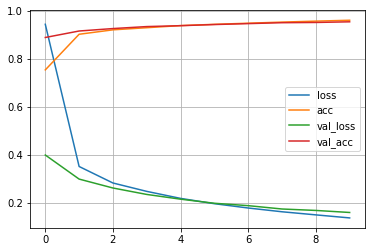

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(6, 4))
pd.DataFrame(
    history.history
).plot();
plt.grid(True)
plt.figure()